
# LINEAR REGRESSION WITH PYTHON
## Includes Stepwise and cross validation

## Steps:
#### 1. Initializing and data audit
#### 2. Select relevant variables: stepwise
#### 3. Data exploration
#### 4. First data splitting
#### 5. SKLEARN execution
    A. Train/Test splitting
    B. Stepwise execution
    C. Plot selected variables
    D. Create predictions
    E. Model evaluation: charts and error measures in train and test datasets
    F. Store predictions and errors in dataset
    F. Use the model on the reserved dataset 
#### 5. STATSMODEL


## Import libraries


In [10]:
import pandas as pd, numpy as np             # Data manipulation 
from matplotlib import pyplot as plt         # Graphing
import seaborn as sns                        # Graphing

import statsmodels.api as sm                    # Statistical analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats                      # Stats

#sns.set(style="white")                       # Tuning the style of charts
import warnings                              # Disable some warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


## Data exploration


In [11]:
file_name = "wage.xlsx"
df = pd.read_excel(file_name)
df.head() 

,ID,EDUC,EXPER,AFROAMERICAN,HOURS,IQ,KWW,TENURE,AGE,MARRIED,SOUTH,URBAN,SIBS,BRTHORD,MEDUC,FEDUC,DEPARTMENT,wage
0,1,12,17,0,56,99,42,11,36,1,1,1,1,2.0,12.0,12.0,1,550
1,2,12,15,0,48,91,39,15,36,1,1,1,1,2.0,8.0,8.0,3,988
2,3,16,10,0,45,116,35,8,29,1,0,1,2,1.0,12.0,12.0,1,876
3,4,12,18,0,40,85,48,19,35,1,0,1,2,1.0,9.0,12.0,2,1058
4,5,16,9,0,40,119,32,10,30,0,1,1,5,1.0,11.0,10.0,2,1105


Some statistics and verify missing values

In [12]:
pd.set_option("display.precision", 2)
df.describe()

,ID,EDUC,EXPER,AFROAMERICAN,HOURS,IQ,KWW,TENURE,AGE,MARRIED,SOUTH,URBAN,SIBS,BRTHORD,MEDUC,FEDUC,DEPARTMENT,wage
count,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00,852.00,857.00,741.00,935.00,935.00
mean,468.00,13.47,11.56,0.13,43.93,101.28,35.74,7.23,33.08,0.89,0.34,0.72,2.94,2.28,10.68,10.22,2.01,957.95
std,270.06,2.20,4.37,0.33,7.22,15.05,7.64,5.08,3.11,0.31,0.47,0.45,2.31,1.60,2.85,3.30,0.82,404.36
min,1.00,9.00,1.00,0.00,20.00,50.00,12.00,0.00,28.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,115.00
25%,234.50,12.00,8.00,0.00,40.00,92.00,31.00,3.00,30.00,1.00,0.00,0.00,1.00,1.00,8.00,8.00,1.00,669.00
50%,468.00,12.00,11.00,0.00,40.00,102.00,37.00,7.00,33.00,1.00,0.00,1.00,2.00,2.00,12.00,10.00,2.00,905.00
75%,701.50,16.00,15.00,0.00,48.00,112.00,41.00,11.00,36.00,1.00,1.00,1.00,4.00,3.00,12.00,12.00,3.00,1160.00
max,935.00,18.00,23.00,1.00,80.00,145.00,56.00,22.00,38.00,1.00,1.00,1.00,14.00,10.00,18.00,18.00,3.00,3078.00


In [13]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

ID                0
EDUC              0
EXPER             0
AFROAMERICAN      0
HOURS             0
IQ                0
KWW               0
TENURE            0
AGE               0
MARRIED           0
SOUTH             0
URBAN             0
SIBS              0
BRTHORD          83
MEDUC            78
FEDUC           194
DEPARTMENT        0
wage              0
dtype: int64

[Text(0.5, 1.0, 'Histogram of wage variable')]

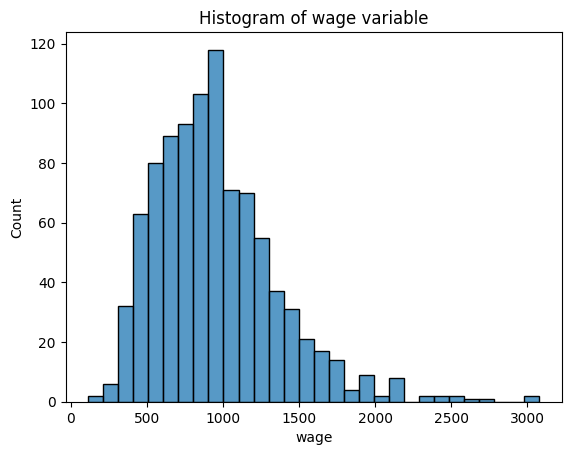

In [14]:
# Histogram of dependent variable
target = "wage"
sns.histplot(df[target]).set(title='Histogram of wage variable')

#### Some data transformation?

In [15]:
df["lnwage"] = np.log(df.wage)
df = pd.get_dummies(df, columns=['DEPARTMENT'], drop_first=True)*1
df

,ID,EDUC,EXPER,AFROAMERICAN,HOURS,IQ,KWW,TENURE,AGE,MARRIED,SOUTH,URBAN,SIBS,BRTHORD,MEDUC,FEDUC,wage,lnwage,DEPARTMENT_2,DEPARTMENT_3
0,1,12,17,0,56,99,42,11,36,1,1,1,1,2.0,12.0,12.0,550,6.31,0,0
1,2,12,15,0,48,91,39,15,36,1,1,1,1,2.0,8.0,8.0,988,6.90,0,1
2,3,16,10,0,45,116,35,8,29,1,0,1,2,1.0,12.0,12.0,876,6.78,0,0
3,4,12,18,0,40,85,48,19,35,1,0,1,2,1.0,9.0,12.0,1058,6.96,1,0
4,5,16,9,0,40,119,32,10,30,0,1,1,5,1.0,11.0,10.0,1105,7.01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,931,16,10,0,40,115,48,4,37,1,1,1,1,2.0,12.0,17.0,1682,7.43,1,0
931,932,12,17,0,40,89,40,8,38,1,1,1,7,7.0,1.0,4.0,1000,6.91,0,1
932,933,12,17,0,40,93,26,18,38,0,1,0,0,1.0,NaN,NaN,409,6.01,1,0
933,934,18,5,0,55,98,45,1,34,1,0,1,2,2.0,13.0,NaN,538,6.29,0,1


### We first reserve a proportion of our data to implement predictions at the end simulating is additional data (10% for instance)


In [16]:
# model = 90%
# reserved = 10%

df_model, df_reserved = train_test_split(df, test_size=0.1, random_state=42)
print ("Sample size dataset reserved for prediction: ", df_reserved.shape[0], "records")

# Sets y
y = df_model[target]

Sample size dataset reserved for prediction:  94 records


# Linear Regression Model with SKLEARN

## Train Test Split from our X dataset 


In [17]:
# cross validation (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.2)
print ("Sample size train dataset: ", X_train.shape)
print ("Sample size test dataset: ", X_test.shape)

Sample size train dataset:  (672, 20)
Sample size test dataset:  (169, 20)


### Function to define stepwise execution

In [18]:
# Stepwise function
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.1, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.4}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.4}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [19]:
# Removes some variables: target, irrelevent and those with missing values (stepwise does not work with them)
# we will call X_train2 to this dataframe

irrelevant_columns = ['ID', 'lnwage', target]
X_train2=X_train.drop(columns=irrelevant_columns)

for field in X_train2:
    if X_train2[field].isnull().any():
        X_train2=X_train2.drop(labels=[field], axis=1)
        
X_train2

,EDUC,EXPER,AFROAMERICAN,HOURS,IQ,KWW,TENURE,AGE,MARRIED,SOUTH,URBAN,SIBS,DEPARTMENT_2,DEPARTMENT_3
304,12,16,0,55,104,41,18,35,1,1,1,4,0,1
476,16,8,0,43,111,38,8,34,1,0,1,4,0,1
637,15,14,0,40,103,30,2,32,1,1,0,0,1,0
570,14,10,0,40,125,30,11,29,1,0,1,2,1,0
562,16,12,0,40,106,41,13,33,1,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,16,10,0,55,114,41,1,33,1,1,0,0,0,0
787,12,18,0,45,90,47,18,37,1,0,1,6,0,0
774,12,14,0,40,96,38,2,35,1,0,1,1,0,0
483,18,14,0,55,84,42,4,37,1,0,1,1,0,0


In [20]:
result = stepwise_selection(X_train2, y_train)
print('resulting features:')
print(result)

Add  EDUC                           with p-value 7.818e-18
Add  KWW                            with p-value 2.648e-09
Add  URBAN                          with p-value 8.668e-08
Add  MARRIED                        with p-value 9.378e-07
Add  TENURE                         with p-value 0.0004949
Add  AFROAMERICAN                   with p-value 0.002233
Add  EXPER                          with p-value 0.004739
Add  SOUTH                          with p-value 0.02843
Add  HOURS                          with p-value 0.02836
resulting features:
['EDUC', 'KWW', 'URBAN', 'MARRIED', 'TENURE', 'AFROAMERICAN', 'EXPER', 'SOUTH', 'HOURS']


### Create a dataframe with chosen explanatory variables

In [ ]:
X_train_stepwise=X_train2
for item in X_train2.columns:
    if item not in result:
        X_train_stepwise=X_train_stepwise.drop(labels=[item],axis=1) #removes the non relevant variables

And we run scatterplots and correlation of explanatory variables since stepwise does not detect it

In [ ]:
sns.pairplot(X_train_stepwise)

In [ ]:
# and heatmap to show correlation between explanatory variables
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(X_train_stepwise.corr(), annot=True, fmt=".2f", linewidths=1, ax=ax)

## Creating and Training the Model

In [ ]:
lm = LinearRegression(fit_intercept=True)
model=lm.fit(X_train_stepwise, y_train)

## Model Evaluation


In [ ]:
# print R squared train dataset
print(f"R squared value is : {model.score(X_train_stepwise,y_train):.3f}")

In [ ]:
# print coefficients (but not confidence intervals: sklearn does not store them)
coeff_df = pd.DataFrame(model.coef_,X_train_stepwise.columns,columns=['Coefficient'])
print("Intercept: ", lm.intercept_)
coeff_df

### Create predictions 

If we accept the model, then we  create predictions on both the train and the test dataset to compare them

First some charts comparing fitted and real values

In [ ]:
predictions_train = lm.predict(X_train[X_train_stepwise.columns]) #only with the columns used in the model

plt.title("Real vs. Fitted (train dataset)")
plt.scatter(y_train,predictions_train)

coef = np.polyfit(y_train, predictions_train, 1)  
poly1d_fn = np.poly1d(coef)  
plt.plot(y, poly1d_fn(y), color="red", label="Regression line")

plt.xlabel("Real")
plt.ylabel("Fitted")
plt.legend()
plt.show()

In [ ]:
# test dataset
predictions_test = lm.predict(X_test[X_train_stepwise.columns]) #only with the columns used in the model
plt.title("Real vs. Fitted (test dataset)")
plt.scatter(y_test,predictions_test, color="orange")

coef = np.polyfit(y_test, predictions_test, 1)  
poly1d_fn = np.poly1d(coef)  
plt.plot(y_test, poly1d_fn(y_test), color="red", label="Regression line")

plt.xlabel("Real")
plt.ylabel("Fitted")

plt.legend()
plt.show()

## Residual Histograms

And residual histograms to check hypothesis of normality in residuals

In [ ]:
# training dataset
sns.histplot((y_train-predictions_train),bins=50, color="green").set(title='Histogram of dependent - train dataset')

In [ ]:
# test dataset
sns.histplot((y_test-predictions_test),bins=50, color="orange").set(title='Histogram of dependent - test dataset')

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Mean Absolute Percentage Error** (MAPE) is the mean of the absolute percent error:

$${\frac 1n\sum_{i=1}^n}{|y_i-\hat{y}_i)|\over y_i}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **MAPE** is the best metric, because allows comparison between different models.

All of these are **loss functions**, because we want to minimize them.


In [ ]:
from sklearn import metrics

# error comparison between the two datasets
print ("Errors:\n")
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'MAPE %'],
    'Train': [
        metrics.mean_absolute_error(y_train, predictions_train),
        metrics.mean_squared_error(y_train, predictions_train),
        np.sqrt(metrics.mean_squared_error(y_train, predictions_train)),
        np.mean(100 * abs(y_train - predictions_train) / y_train)
    ],
    'Test': [
        metrics.mean_absolute_error(y_test, predictions_test),
        metrics.mean_squared_error(y_test, predictions_test),
        np.sqrt(metrics.mean_squared_error(y_test, predictions_test)),
        np.mean(100 * abs(y_test - predictions_test) / y_test)
    ]
}

results_df = pd.DataFrame(results)
results_df

#### Store predictions and errors in the dataset

In [ ]:
def store_predictions (df):
    df = df.copy()
    # first move target variable to the end to show it along with predictions and errors
    df = df[[col for col in df.columns if col !=target] + [target]]
    
    predictions = lm.predict(df[X_train_stepwise.columns])
    df.loc[:, target + "_predicted"] = predictions
    
    df.loc[:, "error"] = df[target] - df[target + "_predicted"]
    df.loc[:, "%abs error"] = abs(100*df["error"]) /  df[target]
    return df

In [ ]:
X_train = store_predictions(X_train)
X_train

In [ ]:
X_test = store_predictions(X_test)
X_test

### Finally, we apply our model to the reserved dataset and calculate metrics

In [ ]:
df_reserved = store_predictions(df_reserved)
df_reserved

In [ ]:
# calculates error, %error and MAPE into the dataframe
print ("Errors in reserved dataset:\n")

print(f"MAE:, {abs(df_reserved["error"]).mean():.2f}")

#print(f"R squared value is : {model.score(X_train_stepwise,y_train):.3f}")
MSE = np.square(df_reserved["error"]).mean()

print(f"MSE: {MSE:.2f}") 
print(f"RMSE: {np.sqrt(MSE):.2f}") 
print (f"MAPE %: {df_reserved["%abs error"].mean():.2f}") 

## ADITIONAL INFO USING STATSMODELS LIBRARY
#### It does not include automatic cross validation like sklearn but allows to obtain confidence intervals

In [ ]:
# model with an additional library (statmodels)
X_train_stepwise = sm.add_constant(X_train_stepwise) 

In [ ]:
result = sm.OLS(y_train, X_train_stepwise).fit()
print (result.summary())